In [136]:

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import os

import matplotlib.dates as mdates
import pandas as pd
import scipy.io
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker


DATOS

In [137]:
directorio_actual = os.getcwd()

datos_sat = "datos\sst.day.mean.2024.nc"

# Crea la ruta al directorio padre (una carpeta atrás)
directorio_padre = os.path.abspath(os.path.join(directorio_actual, os.pardir))
ruta_archivo = os.path.join(directorio_padre,datos_sat)

# DATOS SIMULADOS BOYA
datos_boya = r'C:\Users\andre\Desktop\transformado.xlsx'

print(ruta_archivo)

#DATOS CLIMA. Carga los datos desde el archivo .mat, que viene del script CalcAjuste_SeasCycle
mat_data = scipy.io.loadmat(r'C:\Users\andre\scripts\python\fromMatlab\Y_clim.mat')
# Extrae los datos de Y_clim a representar, matriz (366, 7 (años))
Y_clim = mat_data['Y_Clim'] #numpy array

C:\Users\andre\scripts\python\datos\sst.day.mean.2024.nc


In [138]:
# Abre el archivo NetCDF con xarray
ds = xr.open_dataset(ruta_archivo, decode_cf=False)
#Abre el archivo simulado de datos boya en Excel
df = pd.read_excel(datos_boya)

In [139]:
# Calcula la media de la SST a lo largo del tiempo
sst_mean = ds.sst.mean(dim='time')

#Añadir a los datos satelite una columna con los días en formato 1-365
dias = len(ds.time)
# Crear un nuevo DataArray con valores del 1 al número total de datos
numeros = xr.DataArray(range(1, dias + 1), dims=ds.time.dims)
# Agrega el nuevo DataArray como una nueva variable al Dataset original
ds['numeros'] = numeros

# Calcula la media de 'WaterTemperature' por día
df_mean = df.groupby(df['Time'].dt.date)['WaterTemperature'].mean().reset_index()

C:\Users\andre\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [140]:
# Coordenadas de la boya AGL
boya_AGL = (-3.784, 43.894)

# Rango de niveles para el mapa
levs = np.arange(10, 16, 0.1)

# Crear una versión truncada de la paleta de colores 'jet'
def truncate_colormap(cmap, minval=0.0, maxval=0.5):
    new_cmap = LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, 256)))
    return new_cmap



In [64]:
print("Coordenadas disponibles:")
print(ds.coords) #Con esto veo el formato que tiene lon y lat
print(ds.time)#Con esto veo el formato de fecha, que empieza desde 01-01-1800


Coordenadas disponibles:
Coordinates:
  * time     (time) datetime64[ns] 2024-01-01 2024-01-02 ... 2024-03-31
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
<xarray.DataArray 'time' (time: 91)>
array(['2024-01-01T00:00:00.000000000', '2024-01-02T00:00:00.000000000',
       '2024-01-03T00:00:00.000000000', '2024-01-04T00:00:00.000000000',
       '2024-01-05T00:00:00.000000000', '2024-01-06T00:00:00.000000000',
       '2024-01-07T00:00:00.000000000', '2024-01-08T00:00:00.000000000',
       '2024-01-09T00:00:00.000000000', '2024-01-10T00:00:00.000000000',
       '2024-01-11T00:00:00.000000000', '2024-01-12T00:00:00.000000000',
       '2024-01-13T00:00:00.000000000', '2024-01-14T00:00:00.000000000',
       '2024-01-15T00:00:00.000000000', '2024-01-16T00:00:00.000000000',
       '2024-01-17T00:00:00.000000000', '2024-01-18T00:00:00.000000000',
       '2024-01-19T00:00:00.000000000', 

<xarray.Dataset>
Dimensions:  (time: 91, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 2024-01-01 2024-01-02 ... 2024-03-31
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...

In [53]:
# Convierte las fechas a un formato legible
#ds['time'] = xr.decode_cf(ds)['time']

C:\Users\andre\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\andre\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


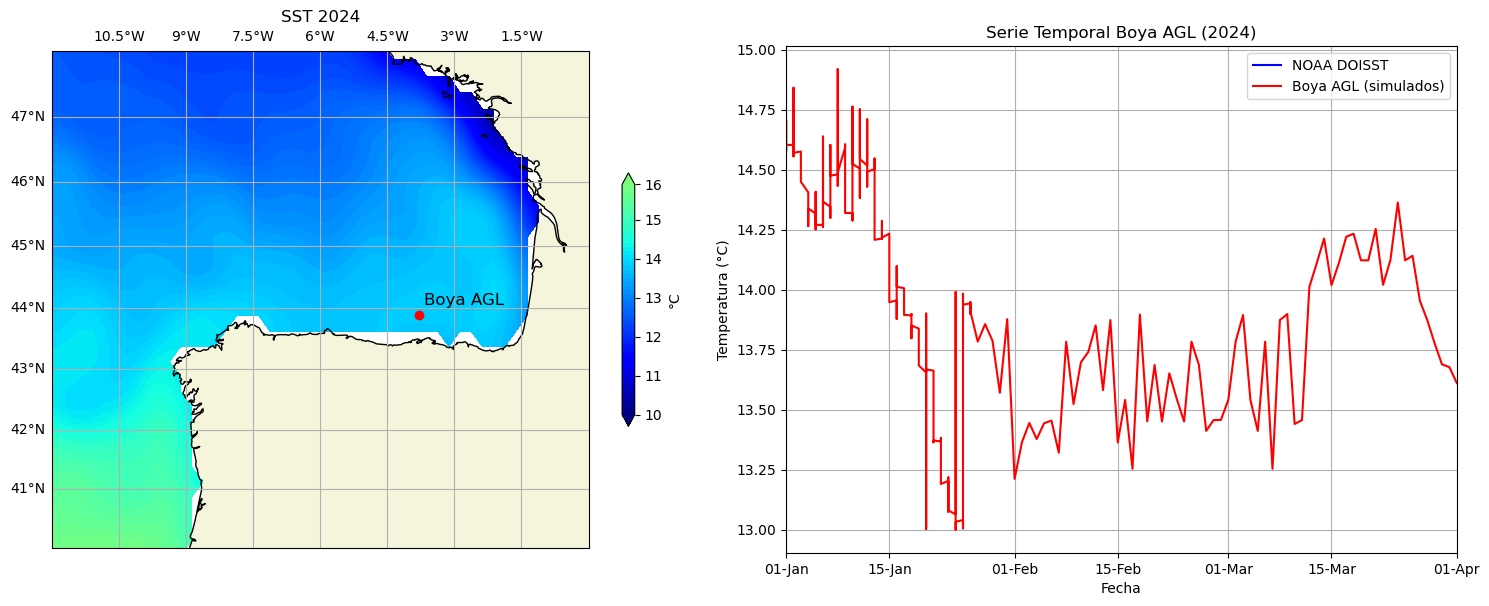

In [90]:
# Crear figura y subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subgráfico 1: Mapa
ax1 = plt.subplot(1, 2, 1, projection=ccrs.Mercator())

# Agrega los datos de SST media al mapa
mapa = ax1.contourf(ds.lon, ds.lat, sst_mean,
                    levs,
                    cmap=truncate_colormap(plt.cm.jet),
                    transform=ccrs.PlateCarree(),
                    extend='both')

# Agrega color beige a la tierra
ax1.add_feature(cfeature.LAND, color='beige')

# Agrega las líneas de costa y la cuadrícula
ax1.coastlines()
grid = ax1.gridlines(draw_labels=True)
grid.bottom_labels = False
grid.right_labels = False

cbar = plt.colorbar(mapa,
            ax=ax1,  # Indica el eje al que se añadirá la barra de color
            label="°C",  # Etiqueta del colorbar
            shrink=0.5)
cbar.locator = ticker.MaxNLocator(nbins=10, integer=True)  #Números enteros en la colorbar
cbar.update_ticks()

# Agrega el punto de la boya
ax1.scatter(boya_AGL[0], boya_AGL[1],
            color='red',
            marker='o',
            transform=ccrs.PlateCarree())

# Agrega texto en el punto especificado
ax1.text(boya_AGL[0] + 0.1, boya_AGL[1] + 0.15,
        'Boya AGL',
        color='black',
        fontsize=12,
        transform=ccrs.PlateCarree())

# Define los límites de la región que deseas mostrar
lon_min, lon_max = -12, 0
lat_min, lat_max = 40, 48

# Establece los límites de la región en los ejes
ax1.set_extent((lon_min, lon_max, lat_min, lat_max))
ax1.set_title("SST 2024")

# Subgráfico 2: Línea temporal. Pasar primero lon y luego lat. Como los datos de lon tiene rango de 0-360, 
#hay que  pasarle % 360, le suma 360 grados repetidamente hasta que la longitud sea positiva y esté en el rango de 0 a 360 grados. Si ya es +, no hace nada
#ax2.plot(ds.time(), ds.sst.sel(lon = -3.78 % 360, lat = 43.89, method='nearest'), color='blue')
#fechas_dia_mes = ds.time.dt.strftime('%d-%m-%Y')
ax2.plot(ds.time, ds.sst.sel(lon = -3.78 % 360, lat = 43.89, method='nearest'), color='blue',label='NOAA DOISST')
ax2.set_xlabel('Fecha')
myFmt = mdates.DateFormatter('%d-%b')
ax2.xaxis.set_major_formatter(myFmt)

# Establecer los límites del eje x
inicio = datetime.datetime(2024, 1, 1)
fin = datetime.datetime(2024, 4, 1)
ax2.set_xlim([inicio, fin])

ax2.set_ylabel('Temperatura (°C)')

ax2.set_title('Serie Temporal Boya AGL (2024)')
ax2.grid()

# Pinta datos_boya con variación horaria
ax2.plot(df.Time, df.WaterTemperature, color='red',label='Boya AGL (simulados)')

ax2.legend()

# Ajustar diseño y mostrar el gráfico
plt.tight_layout()
plt.show()




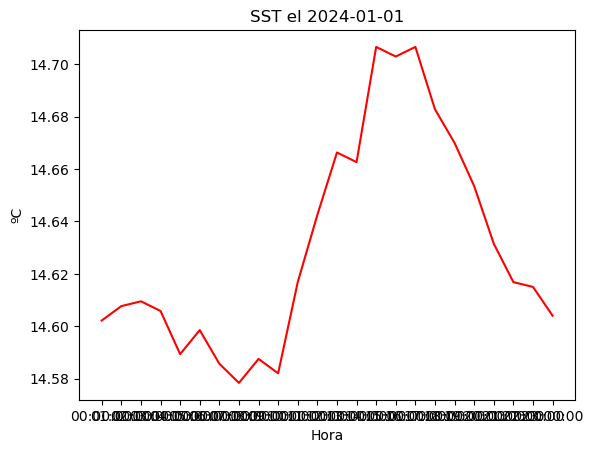

In [9]:
# Selecciona la fecha concreta que deseas plotear
fecha_concreta = '2024-01-01'  

# Filtra el DataFrame para seleccionar solo los datos correspondientes a la fecha concreta
datos_fecha_concreta = df[df['Time'] == fecha_concreta]

# Plotea los datos correspondientes a la fecha concreta
plt.plot(datos_fecha_concreta['Hour'], datos_fecha_concreta['WaterTemperature'], color='red')

# Personaliza el gráfico
plt.title('SST el ' + fecha_concreta)
plt.xlabel('Hora')
plt.ylabel('ºC')

# Muestra el gráfico
plt.show()


C:\Users\andre\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\andre\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


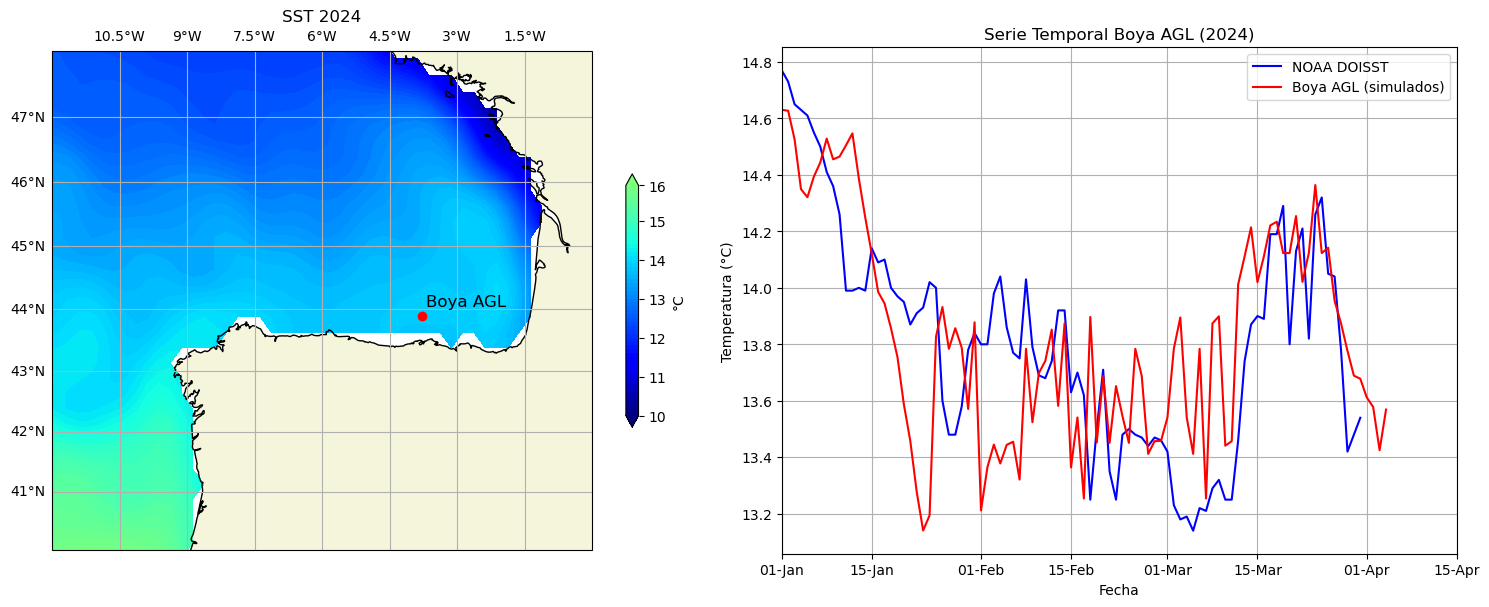

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subgráfico 1: Mapa
ax1 = plt.subplot(1, 2, 1, projection=ccrs.Mercator())

# Agrega los datos de SST media al mapa
mapa = ax1.contourf(ds.lon, ds.lat, sst_mean,
                    levs,
                    cmap=truncate_colormap(plt.cm.jet),
                    transform=ccrs.PlateCarree(),
                    extend='both')

# Agrega color beige a la tierra
ax1.add_feature(cfeature.LAND, color='beige')

# Agrega las líneas de costa y la cuadrícula
ax1.coastlines()
grid = ax1.gridlines(draw_labels=True)
grid.bottom_labels = False
grid.right_labels = False

cbar = plt.colorbar(mapa,
            ax=ax1,  # Indica el eje al que se añadirá la barra de color
            label="°C",  # Etiqueta del colorbar
            shrink=0.5)
cbar.locator = ticker.MaxNLocator(nbins=10, integer=True)  #Números enteros en la colorbar
cbar.update_ticks()

# Agrega el punto de la boya
ax1.scatter(boya_AGL[0], boya_AGL[1],
            color='red',
            marker='o',
            transform=ccrs.PlateCarree())

# Agrega texto en el punto especificado
ax1.text(boya_AGL[0] + 0.1, boya_AGL[1] + 0.15,
        'Boya AGL',
        color='black',
        fontsize=12,
        transform=ccrs.PlateCarree())

# Define los límites de la región que deseas mostrar
lon_min, lon_max = -12, 0
lat_min, lat_max = 40, 48

# Establece los límites de la región en los ejes
ax1.set_extent((lon_min, lon_max, lat_min, lat_max))
ax1.set_title("SST 2024")

# Subgráfico 2: Línea temporal. Pasar primero lon y luego lat. Como los datos de lon tiene rango de 0-360, 
#hay que  pasarle % 360, le suma 360 grados repetidamente hasta que la longitud sea positiva y esté en el rango de 0 a 360 grados. Si ya es +, no hace nada
#ax2.plot(ds.time(), ds.sst.sel(lon = -3.78 % 360, lat = 43.89, method='nearest'), color='blue')
#fechas_dia_mes = ds.time.dt.strftime('%d-%m-%Y')
ax2.plot(ds.time, ds.sst.sel(lon = -3.78 % 360, lat = 43.89, method='nearest'), color='blue',label='NOAA DOISST')
ax2.set_xlabel('Fecha')
myFmt = mdates.DateFormatter('%d-%b')
ax2.xaxis.set_major_formatter(myFmt)

# Establecer los límites del eje x
inicio = datetime.datetime(2024, 1, 1)
fin = datetime.datetime(2024, 4, 15)
ax2.set_xlim([inicio, fin])

ax2.set_ylabel('Temperatura (°C)')

ax2.set_title('Serie Temporal Boya AGL (2024)')
ax2.grid()

# Calcula la media de 'WaterTemperature' por día
df_mean = df.groupby(df['Time'].dt.date)['WaterTemperature'].mean().reset_index()

# Plotea la media de 'WaterTemperature' por día
ax2.plot(df_mean.Time, df_mean.WaterTemperature, color='red',label='Boya AGL (simulados)')

ax2.legend()

# Ajustar diseño y mostrar el gráfico
plt.tight_layout()
plt.savefig('02042024.png')
plt.show()


TODAS

C:\Users\andre\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\andre\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


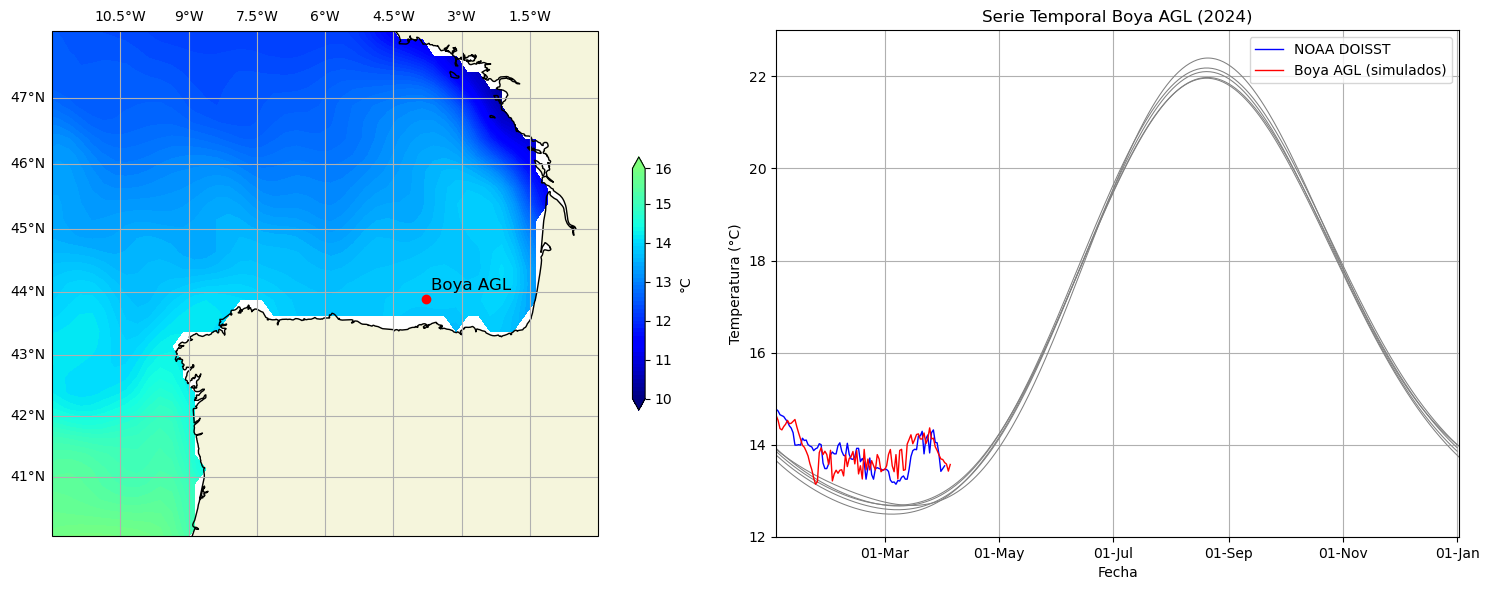

In [141]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subgráfico 1: Mapa
ax1 = plt.subplot(1, 2, 1, projection=ccrs.Mercator())

# Agrega los datos de SST media al mapa
mapa = ax1.contourf(ds.lon, ds.lat, sst_mean,
                    levs,
                    cmap=truncate_colormap(plt.cm.jet),
                    transform=ccrs.PlateCarree(),
                    extend='both')

# Agrega color beige a la tierra
ax1.add_feature(cfeature.LAND, color='beige')

# Agrega las líneas de costa y la cuadrícula
ax1.coastlines()
grid = ax1.gridlines(draw_labels=True)
grid.bottom_labels = False
grid.right_labels = False

cbar = plt.colorbar(mapa,
            ax=ax1,  # Indica el eje al que se añadirá la barra de color
            label="°C",  # Etiqueta del colorbar
            shrink=0.5)
cbar.locator = ticker.MaxNLocator(nbins=10, integer=True)  #Números enteros en la colorbar
cbar.update_ticks()

# Agrega el punto de la boya
ax1.scatter(boya_AGL[0], boya_AGL[1],
            color='red',
            marker='o',
            transform=ccrs.PlateCarree())

# Agrega texto en el punto especificado
ax1.text(boya_AGL[0] + 0.1, boya_AGL[1] + 0.15,
        'Boya AGL',
        color='black',
        fontsize=12,
        transform=ccrs.PlateCarree())

# Define los límites de la región que deseas mostrar
lon_min, lon_max = -12, 0
lat_min, lat_max = 40, 48

# Establece los límites de la región en los ejes
ax1.set_extent((lon_min, lon_max, lat_min, lat_max))
#ax1.set_title("SST 2024")

#############################################################################################################

# Subgráfico 2: Línea temporal. Pasar primero lon y luego lat. Como los datos de lon tiene rango de 0-360, 
#hay que  pasarle % 360, le suma 360 grados repetidamente hasta que la longitud sea positiva y esté en el rango de 0 a 360 grados. Si ya es +, no hace nada
#ax2.plot(ds.time(), ds.sst.sel(lon = -3.78 % 360, lat = 43.89, method='nearest'), color='blue')
#fechas_dia_mes = ds.time.dt.strftime('%d-%m-%Y')

ax2.set_xlim(1, 366)
ax2.set_ylim(12, 23)
ax2.set_xlabel('Fecha')
#Formato fechas eje x
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1, interval=2))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax2.set_ylabel('Temperatura (°C)')
ax2.set_title('Serie Temporal Boya AGL (2024)')
ax2.grid()


#CLIMA
# Rango de años para buclear la climatologia
years = np.arange(2008, 2013)
for i, year in enumerate(years):
    # Selecciona los datos de Y_clim correspondientes a este año
    y_clim_year = Y_clim[:, i]
    # Grafica los datos para este año con un color del colormap
    #ax.plot(np.arange(1, 367), y_clim_year, '-', linewidth=1, color=cmap(i))
    clim = ax2.plot(np.arange(1, 367), y_clim_year, '-', linewidth=0.75, color='grey')

#SATÉLITE
ax2.plot(ds.numeros, ds.sst.sel(lon = -3.78 % 360, lat = 43.89, method='nearest'), color='blue', linewidth=1, label='NOAA DOISST')

#BOYA
#Plotea la media de 'WaterTemperature' por día, poniendo en x el index en lugar de fecha
ax2.plot(df_mean.index, df_mean.WaterTemperature, color='red',linewidth=1, label='Boya AGL (simulados)')


# Ajustar diseño y mostrar el gráfico
ax2.legend()
plt.tight_layout()
plt.savefig('02042024.png')
plt.show()